In [95]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

iteration=600

# Load the experiment data.
def get_data():
    data = load_svmlight_file("housing_scale.txt")
    return data[0], data[1]

X,y=get_data()
loss_mintrainhistory = []
loss_mintesthistory=[]

In [96]:
# append the bias dimension of ones
X=np.hstack([X.toarray(), np.ones((X.shape[0], 1))])

# Divide dataset into training set and validation set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train=y_train.reshape(-1,1)

In [97]:
# find the better lamda and learning_rate to minimize the L(test)
mintestloss=999
for k in range(100):
    lamda = 10**np.random.uniform(-3, 0)
    learning_rate = 10**np.random.uniform(-5, -2)
    # Initialize linear model parameters. 
    # w: A numpy array of shape (1, D) containing weights.
    w=np.random.random((1,14))
    loss_trainhistory = []
    loss_testhistory=[]
    for i in range(iteration):
        #  Choose loss function and derivation  L=1/n ∑_(i=1)^n▒〖(y_i-(w^T x_i ))^2+λ/2 ‖w‖_2^2 〗

        #  Get the loss L_train under the trainin set and L_validation by validating under validation set.
        loss_train=lamda/2*(np.linalg.norm(w,2)**2)+np.mean((y_train.reshape((-1,1))-X_train.dot(w.T))**2)
        loss_trainhistory.append(loss_train)
        loss_test=lamda/2*(np.linalg.norm(w,2)**2)+np.mean((y_test.reshape((-1,1))-X_test.dot(w.T))**2)
        loss_testhistory.append(loss_test)
        #  Calculate gradient G toward loss function from all samples.
        dw=-2*np.mean(X_train*(y_train-X_train.dot(w.T)),axis=0,keepdims = True)+lamda*w
        # Update model: W_t=W_(t-1)+ηD .
        w=w-learning_rate*dw
    if loss_test<mintestloss:
        mintestloss=loss_test
        loss_mintrainhistory = loss_trainhistory
        loss_mintesthistory = loss_testhistory
    print(k,'time:','lamda =',lamda,'learning_rate =',learning_rate,'loss_test =',loss_test)
print(mintestloss)

0 time: lamda = 0.02736377716476823 learning_rate = 0.0014272321929596245 loss_test = 48.7416731893
1 time: lamda = 0.023426051697101314 learning_rate = 2.715004222824955e-05 loss_test = 433.968775873
2 time: lamda = 0.027317989755483996 learning_rate = 0.0019607403467466087 loss_test = 42.4144232466
3 time: lamda = 0.004214319840184549 learning_rate = 5.2498799735219235e-05 loss_test = 347.07830937
4 time: lamda = 0.4863836988915443 learning_rate = 0.0031502950790664214 loss_test = 74.4737185215
5 time: lamda = 0.052140227753004004 learning_rate = 0.0072747740728735496 loss_test = 33.4842587816
6 time: lamda = 0.010360999389475753 learning_rate = 0.00023456905037116181 loss_test = 91.1406037777
7 time: lamda = 0.3646872151959999 learning_rate = 4.507569308075002e-05 loss_test = 369.149632416
8 time: lamda = 0.0016466255128741777 learning_rate = 0.00015427257167394291 loss_test = 138.919687884
9 time: lamda = 0.001208833763717085 learning_rate = 0.0005332259630829465 loss_test = 56.155

82 time: lamda = 0.2909048865570023 learning_rate = 0.00017655211455404332 loss_test = 128.392850505
83 time: lamda = 0.0886788829291177 learning_rate = 0.0006201290326507342 loss_test = 57.9445317223
84 time: lamda = 0.0027404043722266173 learning_rate = 0.001237577437517428 loss_test = 48.4520647741
85 time: lamda = 0.02012471377316046 learning_rate = 0.007283286939899727 loss_test = 28.8475158557
86 time: lamda = 0.29346336692905767 learning_rate = 0.00041399978406471817 loss_test = 76.3841499426
87 time: lamda = 0.0042544974783674154 learning_rate = 5.924117824310908e-05 loss_test = 326.999215207
88 time: lamda = 0.006915521098766501 learning_rate = 3.1348156303935654e-05 loss_test = 427.318678334
89 time: lamda = 0.5262450124614445 learning_rate = 0.0004714363555063755 loss_test = 85.3417658837
90 time: lamda = 0.021194107300955504 learning_rate = 5.7320291041729643e-05 loss_test = 315.957675385
91 time: lamda = 0.8284839168680287 learning_rate = 1.1408861070152053e-05 loss_test =

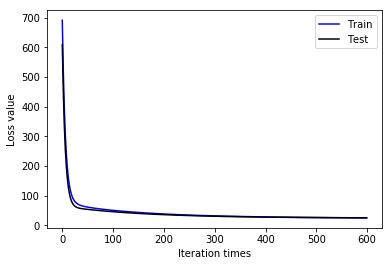

In [98]:
#  drawing graph of L_train as well as L_validation with the number of iterations.
plt.plot(loss_mintrainhistory,'blue',label='Train')
plt.plot(loss_mintesthistory,'black',label='Test')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()

In [99]:
print(loss_mintrainhistory[-1])
print(loss_mintesthistory[-1])

25.0947202559
24.817832418
